In [1]:
import pandas as pd
import numpy as np
import time, random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define Functions

In [2]:
iter_num = 10000

## List Append

In [3]:
def list_append():
    time_start = time.time()

    list_temp = []
    for i in range(iter_num):
        a = random.randint(50, 100)
        b = random.randint(50, 100)
        c = random.randint(50, 100)
        list_temp.append([a, b, c])

    df = pd.DataFrame(list_temp, columns=['input_a', 'input_b', 'input_c'])
    time_delta = time.time() - time_start
    
    return time_delta

## Pandas from_dict

### key='columns' (default)

In [4]:
def from_dict_columns():
    time_start = time.time()

    dict_col = {'input_a': [], 'input_b': [], 'input_c': []}
    for i in range(iter_num):
        a = random.randint(50, 100)
        b = random.randint(50, 100)
        c = random.randint(50, 100)
        dict_col['input_a'].append(a)
        dict_col['input_b'].append(b)
        dict_col['input_c'].append(c)

    df = pd.DataFrame.from_dict(dict_col, orient='columns')
    time_delta = time.time() - time_start
    
    return time_delta

### key='index'

In [5]:
def from_dict_index():
    time_start = time.time()

    dict_idx = {}
    for i in range(iter_num):
        a = random.randint(50, 100)
        b = random.randint(50, 100)
        c = random.randint(50, 100)
        dict_idx[i] = [a, b, c]

    df = pd.DataFrame.from_dict(dict_idx, orient='index', columns=['input_a', 'input_b', 'input_c'])
    time_delta = time.time() - time_start
    
    return time_delta

# Iter Functions

In [6]:
func_num = 1000

In [7]:
list_funcs = ['list_append', 'from_dict_columns', 'from_dict_index']
dict_funcs = {}

In [8]:
for funcs in list_funcs:
    list_sec = []
    for i in tqdm(range(func_num)):
        list_sec.append(eval(funcs)())
    dict_funcs[funcs] = list_sec

100%|██████████| 1000/1000 [00:27<00:00, 35.74it/s]


# Display Results

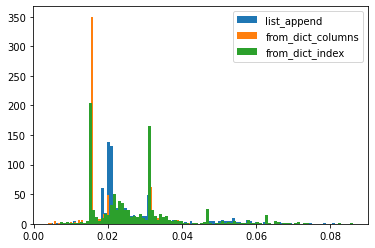

In [9]:
dict_results = {}
for key, list_secs in dict_funcs.items():
    plt.hist(list_secs, bins=100, label=key)
    dict_results[key] = [np.average(list_secs), np.var(list_secs), np.median(list_secs)]
plt.legend()
plt.show()

In [10]:
df_results = pd.DataFrame.from_dict(dict_results, orient='index', columns=['Ave.', 'Var.', 'Med.'])

In [11]:
df_results

,Ave.,Var.,Med.
list_append,0.025415,0.000128,0.020978
from_dict_columns,0.022719,0.000064,0.020025
from_dict_index,0.027730,0.000160,0.024980
